<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm #QQ plot
import warnings
warnings.filterwarnings('ignore') # ignore warningson goes here

%matplotlib inline 
 #TE PERMITE HACER PLOTS EN MITAD DE UNA LINEA SIN QUE TE LO PUSE
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_information = pd.read_csv('financial_assets_information.csv')
df_prices = pd.read_csv('financial_assets_prices.csv')
df_weights = pd.read_csv('portfolio_weights.csv')

<h2 style="color: #FF6347;">LIMPIEZA</h2>

In [3]:
asset1_nan = df_prices['Asset1'].isna().sum()
asset2_nan = df_prices['Asset2'].isna().sum()
asset3_nan = df_prices['Asset3'].isna().sum()
asset4_nan = df_prices['Asset4'].isna().sum()
asset5_nan = df_prices['Asset5'].isna().sum()

print(f'Nulos en asset 1: {asset1_nan}')
print(f'Nulos en asset 2: {asset2_nan}')
print(f'Nulos en asset 3: {asset3_nan}')
print(f'Nulos en asset 4: {asset4_nan}')
print(f'Nulos en asset 5: {asset5_nan}')

Nulos en asset 1: 13
Nulos en asset 2: 13
Nulos en asset 3: 13
Nulos en asset 4: 49
Nulos en asset 5: 20


In [4]:
df_prices = df_prices.dropna(subset=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'])


<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

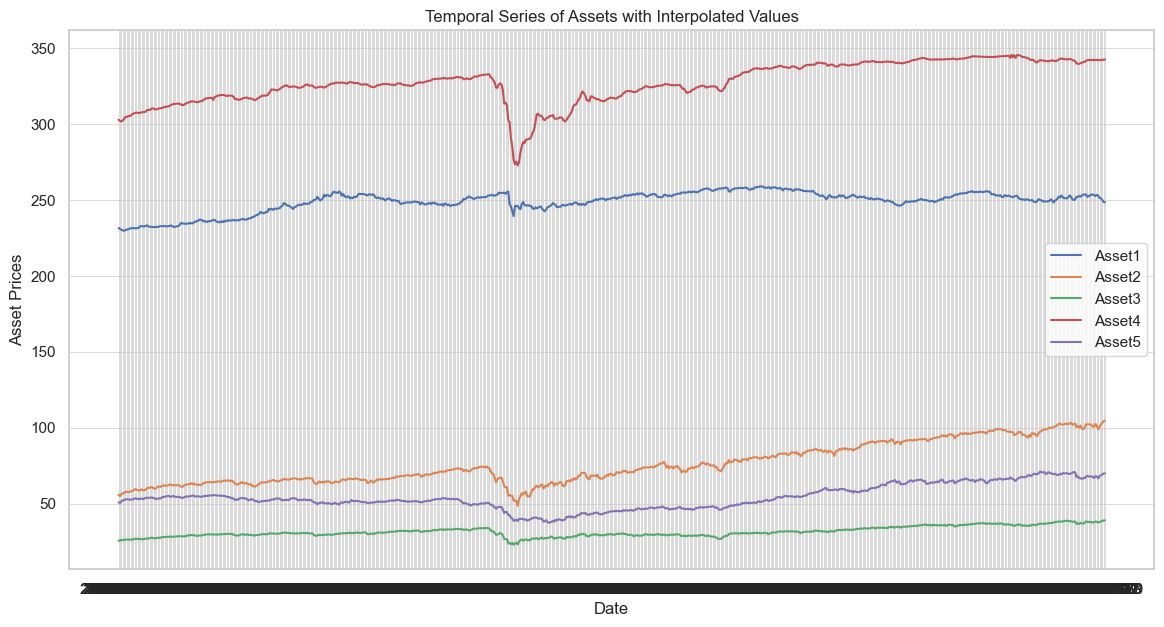

In [5]:
# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_prices, x='date', y='Asset1', label='Asset1')
sns.lineplot(data=df_prices, x='date', y='Asset2', label='Asset2')
sns.lineplot(data=df_prices, x='date', y='Asset3', label='Asset3')
sns.lineplot(data=df_prices, x='date', y='Asset4', label='Asset4')
sns.lineplot(data=df_prices, x='date', y='Asset5', label='Asset5')

# Personalizar el gráfico
plt.grid(True, which='both', linestyle='solid', linewidth=0.5)
plt.title('Temporal Series of Assets with Interpolated Values')
plt.xlabel('Date')
plt.ylabel('Asset Prices')
plt.legend()
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

<h3 style="color: #FF6347;">-- OPCION A --</h2>

In [6]:
df_prices_return = df_prices.copy()

In [7]:
for asset in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    df_prices_return[f'{asset}_Daily_Return'] = 0.0  # Asignamos inicialmente 0.0

for asset in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    for i in range(1, len(df_prices_return)):
         df_prices_return[f'{asset}_Daily_Return'].iloc[i] = ((df_prices_return[asset].iloc[i] - df_prices_return[asset].iloc[i - 1]) / (df_prices_return[asset].iloc[i-1])) * 100

df_prices_return.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Asset1_Daily_Return,Asset2_Daily_Return,Asset3_Daily_Return,Asset4_Daily_Return,Asset5_Daily_Return
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13,-0.153486,0.100285,0.703977,0.360533,-0.019179


In [8]:
df_prices_return_2 = df_prices.copy()

<h4 style="color: #FF6347;">-- OPCION B --</h4>

In [ ]:
df_prices_return_2['date'] = pd.to_datetime(df_prices_return_2['date'])
df_prices_return_2.set_index('date', inplace=True)

daily_returns = df_prices_return_2.pct_change() * 100  # Calcular rendimientos diarios para todos los asset

daily_returns.columns = [f'{col}_Daily_Return' for col in daily_returns.columns]

df_prices_return_2 = pd.concat([df_prices_return_2, daily_returns], axis=1)

df_prices_return_2 = df_prices_return_2.reset_index()

In [10]:
df_prices_return_2.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5,Asset1_Daily_Return,Asset2_Daily_Return,Asset3_Daily_Return,Asset4_Daily_Return,Asset5_Daily_Return
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13,-0.153486,0.100285,0.703977,0.360533,-0.019179


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [11]:
num = df_prices.select_dtypes(include='number')

correlation_matrix = num.corr()

correlation_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,0.512296,0.380556,0.568261,0.069369
Asset2,0.512296,1.000000,0.906736,0.880134,0.827004
Asset3,0.380556,0.906736,1.000000,0.880221,0.865331
Asset4,0.568261,0.880134,0.880221,1.000000,0.779235
Asset5,0.069369,0.827004,0.865331,0.779235,1.000000


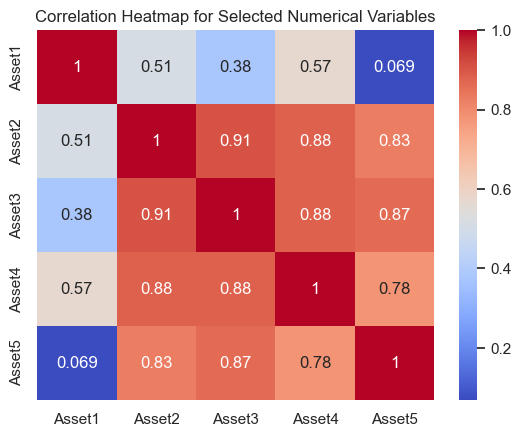

In [12]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

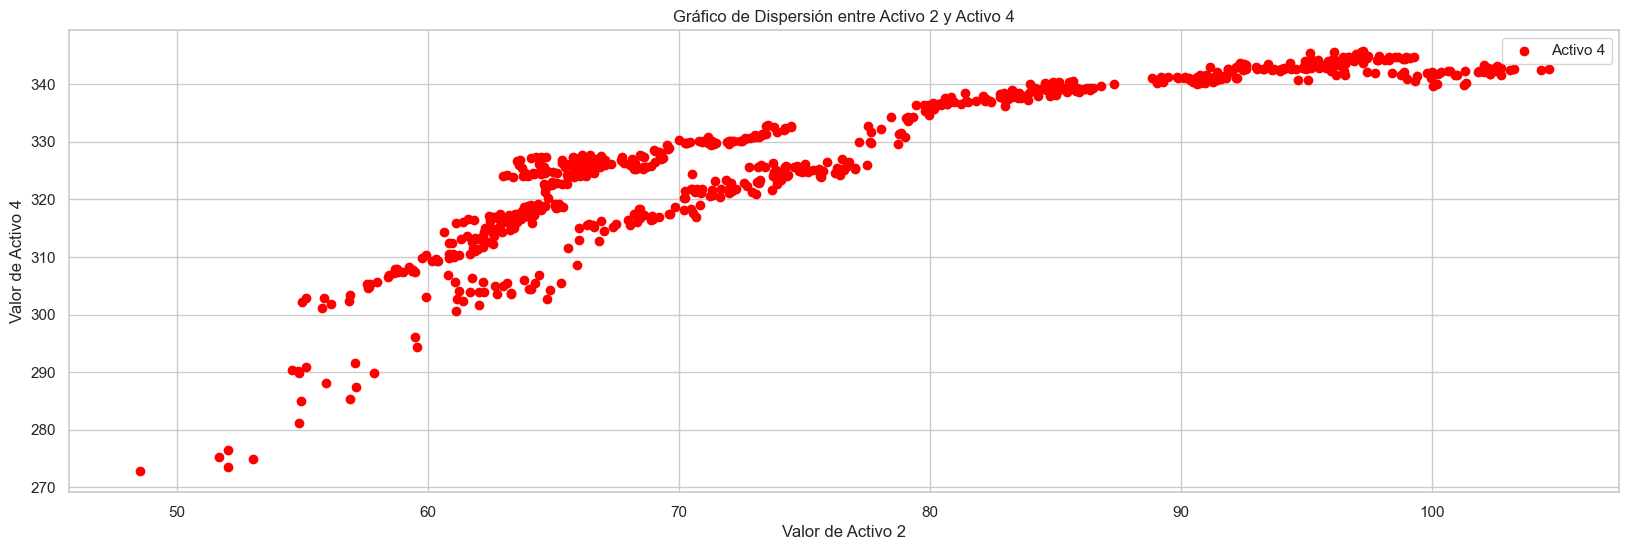

In [26]:
plt.figure(figsize=(20, 6))

# Graficar activo_4 vs activo_2 con puntos rojos.
plt.scatter(df_prices['Asset2'], df_prices['Asset4'], alpha=1, color='red', label='Activo 4')

# Graficar nuevamente activo_4 vs activo_2 con puntos amarillos y menor alfa para ver la superposición.
#plt.scatter(df['activo_2'], df['activo_4'], alpha=0.15, color='yellow', label='Activo 2')

plt.title('Gráfico de Dispersión entre Activo 2 y Activo 4')
plt.xlabel('Valor de Activo 2')
plt.ylabel('Valor de Activo 4')
plt.legend()
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [14]:
df_weights.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


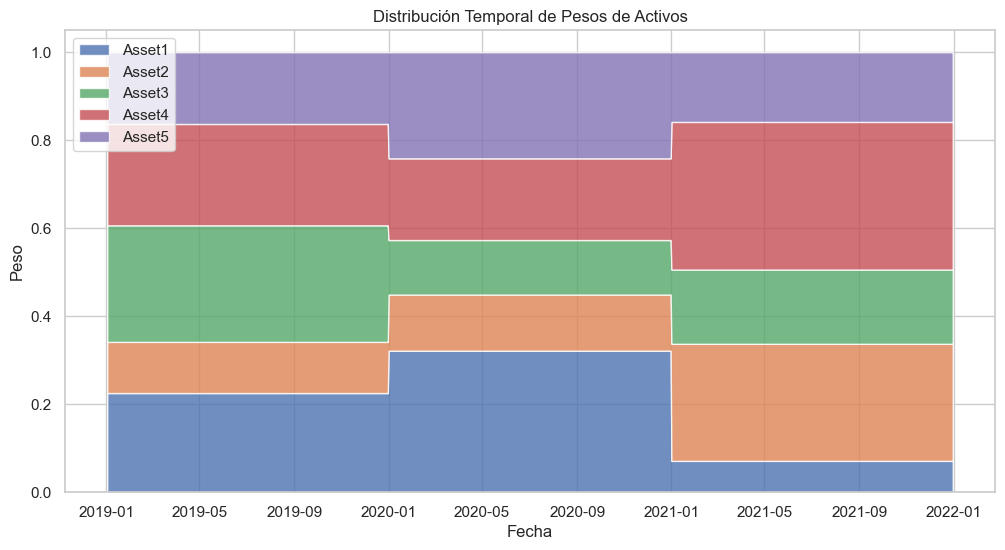

In [15]:
df_weights['date'] = pd.to_datetime(df_weights['date'])
df_weights.set_index('date', inplace=True)

# Generar el gráfico de área apilada
plt.figure(figsize=(12, 6))
plt.stackplot(df_weights.index, df_weights.T, labels=df_weights.columns, alpha=0.8)
plt.legend(loc='upper left')
plt.title("Distribución Temporal de Pesos de Activos")
plt.xlabel("Fecha")
plt.ylabel("Peso")
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

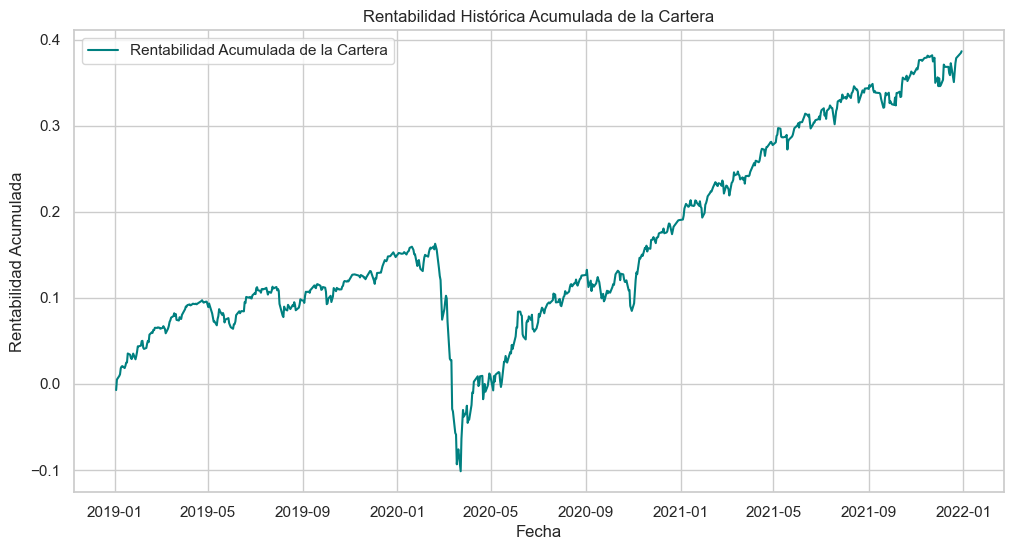

In [16]:
# Convertir la columna 'date' a formato datetime y establecer como índice
df_prices['date'] = pd.to_datetime(df_prices['date'])
df_prices.set_index('date', inplace=True)

# Calcular el retorno diario para cada activo
df_returns = df_prices.pct_change()

# Calcular la rentabilidad diaria promedio de la cartera
df_returns['Portfolio'] = df_returns.mean(axis=1)

# Calcular la rentabilidad acumulada de la cartera
df_cumulative_returns = (1 + df_returns['Portfolio']).cumprod() - 1

# Graficar la rentabilidad histórica acumulada
plt.figure(figsize=(12, 6))
plt.plot(df_cumulative_returns, label="Rentabilidad Acumulada de la Cartera", color="teal")
plt.title("Rentabilidad Histórica Acumulada de la Cartera")
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad Acumulada")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
df_returns.head()

,Asset1,Asset2,Asset3,Asset4,Asset5,Portfolio
date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432,-0.007188
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242,0.012317
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792,0.004086
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192,0.001984


<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [18]:
df_cumulative_returns = df_returns['Portfolio'].iloc[-1] - 1

# Calcular el número de años en el período (días entre primera y última fecha dividido por 252)
days = (df_prices.index[-1] - df_prices.index[0]).days
years = days / 252  # 252 días es el promedio de días de trading en un año

# Calcular la rentabilidad anualizada
annualized_return = (1 + df_cumulative_returns) ** (1 / years) - 1

print(f"Rentabilidad acumulada: {df_cumulative_returns:.2%}")
print(f"Rentabilidad anualizada: {annualized_return:.2%}")

Rentabilidad acumulada: -99.86%
Rentabilidad anualizada: -77.84%


<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [ ]:
daily_volatility = df_returns['Portfolio'].std()

# (multiplicamos por la raíz cuadrada de 252)
annualized_volatility = daily_volatility * np.sqrt(252)

print(f"Volatilidad anualizada: {annualized_volatility:.2%}")

Volatilidad anualizada: 10.27%


<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [20]:
df_information

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [21]:
df_weights['Fixed income'] = df_weights['Asset1'] + df_weights['Asset2']
df_weights['Equity'] = df_weights['Asset3'] + df_weights['Asset4']
df_weights['Alternative'] = df_weights['Asset5']




In [22]:
df_weights.drop(columns=['Asset1','Asset2','Asset3','Asset4','Asset5'],inplace=True)
df_weights.head()

,Fixed income,Equity,Alternative
date,,,
2019-01-02,0.341713,0.495313,0.162974
2019-01-03,0.341713,0.495313,0.162974
2019-01-04,0.341713,0.495313,0.162974
2019-01-07,0.341713,0.495313,0.162974
2019-01-08,0.341713,0.495313,0.162974


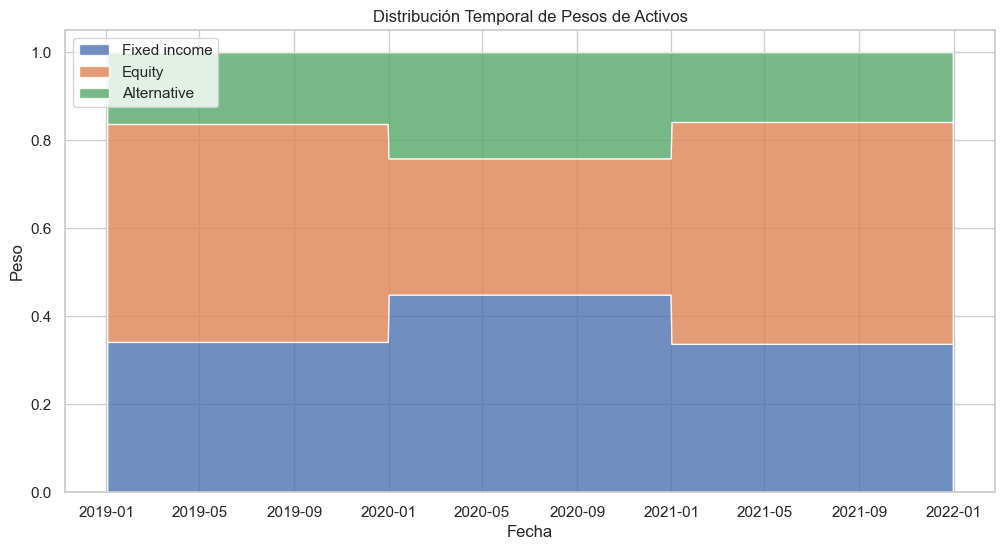

In [23]:

# Generar el gráfico de área apilada
plt.figure(figsize=(12, 6))
plt.stackplot(df_weights.index, df_weights.T, labels=df_weights.columns, alpha=0.8)
plt.legend(loc='upper left')
plt.title("Distribución Temporal de Pesos de Activos")
plt.xlabel("Fecha")
plt.ylabel("Peso")
plt.show()